In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [118]:
data = pd.read_csv('/content/drive/MyDrive/TSA_BDA_2024/Lab4/Retail_sales_of_electricity_United_States_monthly.csv', skiprows=4)

In [119]:
data.dropna(inplace=True)
data['DatePart'] = pd.to_datetime(data['Month'], format='%b %Y', errors='coerce')
data.rename(columns = {"DatePart" : "Date"}, inplace=True)
data.set_index("Date", inplace=True)
data.drop(columns=["Month"], inplace=True)

In [120]:
data

,all sectors million kilowatthours
Date,
2022-10-01,292257.74617
2022-09-01,297195.94414
2022-08-01,340543.84071
2022-07-01,389626.28230
2022-06-01,389214.17473
...,...
2001-04-01,264490.49166
2001-03-01,254390.93545
2001-02-01,269298.40142


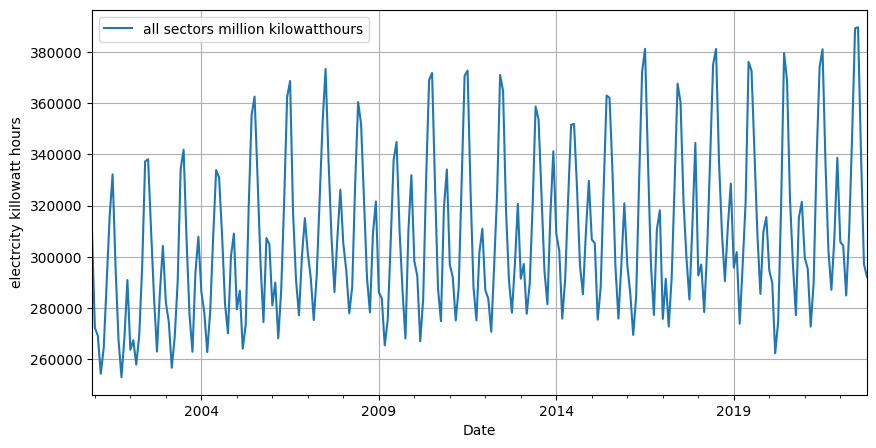

In [121]:
data.plot(figsize=(10,5), grid=True)
plt.ylabel("electrcity killowatt hours")
plt.show()

In [122]:
data.sort_index(inplace=True)
data

,all sectors million kilowatthours
Date,
2000-12-01,310816.06880
2001-01-01,272334.73804
2001-02-01,269298.40142
2001-03-01,254390.93545
2001-04-01,264490.49166
...,...
2022-06-01,389214.17473
2022-07-01,389626.28230
2022-08-01,340543.84071


Splitting data into training and testing 90% and 10% respectively.

In [123]:
length = len(data)
test_size = 0.1
split_index = int(length * (1 - test_size))
X_train = data[:split_index+1]
X_test = data[split_index:]

In [124]:
fcast_months = len(X_test)

creating various instances of Holt Winter's Exponentail Smoothing with :
1. fit1 -> additive trend with additive seasonal
2. fit2 -> additive trend with multiplicative seasonal
3. fit3 -> multiplicative trend with additive seasonal
4. fit4 -> multiplicative trend with multiplicative seasonal

In [125]:
fit1 = ExponentialSmoothing(
    X_train,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    initialization_method="estimated",
).fit()
fit2 = ExponentialSmoothing(
    X_train,
    seasonal_periods=12,
    trend="add",
    seasonal="mul",
    initialization_method="estimated",
).fit()
fit3 = ExponentialSmoothing(
    X_train,
    seasonal_periods=12,
    trend="mul",
    seasonal="add",
    initialization_method="estimated",
).fit()
fit4 = ExponentialSmoothing(
    X_train,
    seasonal_periods=12,
    trend="mul",
    seasonal="mul",
    initialization_method="estimated",
).fit()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmode

In [132]:
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Both Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Additive (t) ,Multiplicative (s)"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Multiplicative (t) ,Additive (s)"] = [fit3.params[p] for p in params] + [fit3.sse]
results["Both Multiplicative"] = [fit4.params[p] for p in params] + [fit4.sse]




Fitting Forecating for months in the future and plotting resutls.

FIT 1 with additive trend with additive seasonal

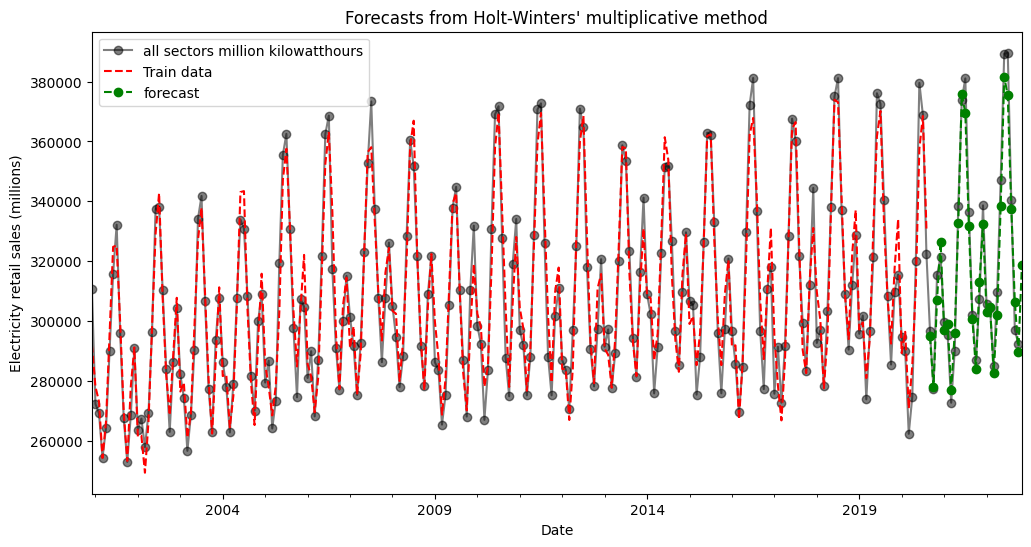

In [127]:
ax = data.plot(
    figsize=(12, 6),
    marker="o",
    color="black",
    alpha=0.5,
    title="Forecasts from Holt-Winters' multiplicative method",
    label="actual values"
)
ax.set_ylabel("Electricity retail sales (millions)")
fit1.fittedvalues.plot(ax=ax, style="--", color="red", label="Train data")
fit1.forecast(fcast_months).rename("forecast").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)
plt.legend()
plt.show()

FIT 2 with additive trend with multiplicative seasonal

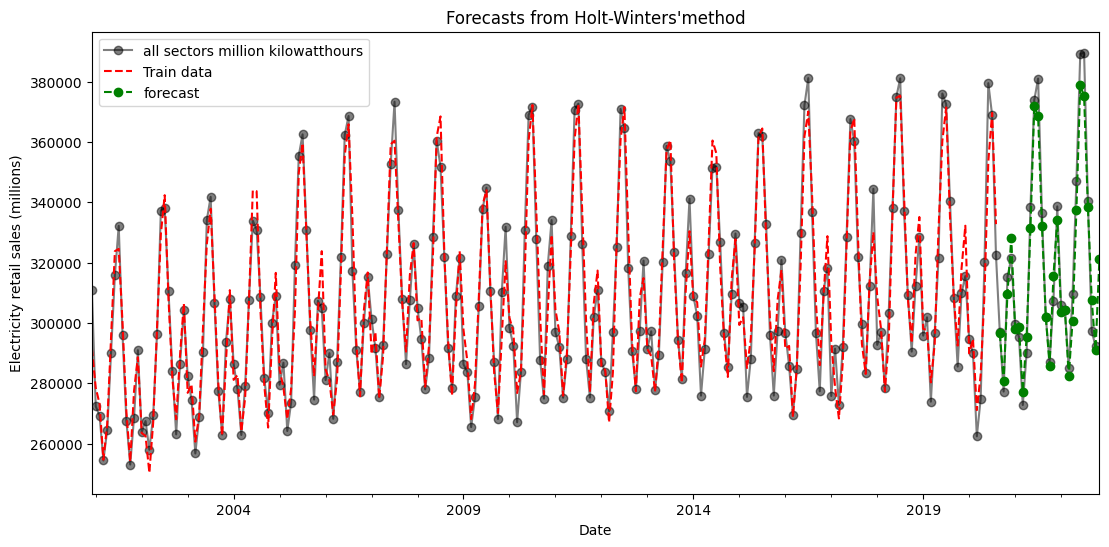

In [128]:
ax = data.plot(
    figsize=(13, 6),
    marker="o",
    color="black",
    alpha=0.5,
    title="Forecasts from Holt-Winters'method",
    label="actual values"
)
ax.set_ylabel("Electricity retail sales (millions)")
fit2.fittedvalues.plot(ax=ax, style="--", color="red", label="Train data")
fit2.forecast(fcast_months).rename("forecast").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)
plt.legend()
plt.show()

FIT 3 multiplicative trend with additive seasonal

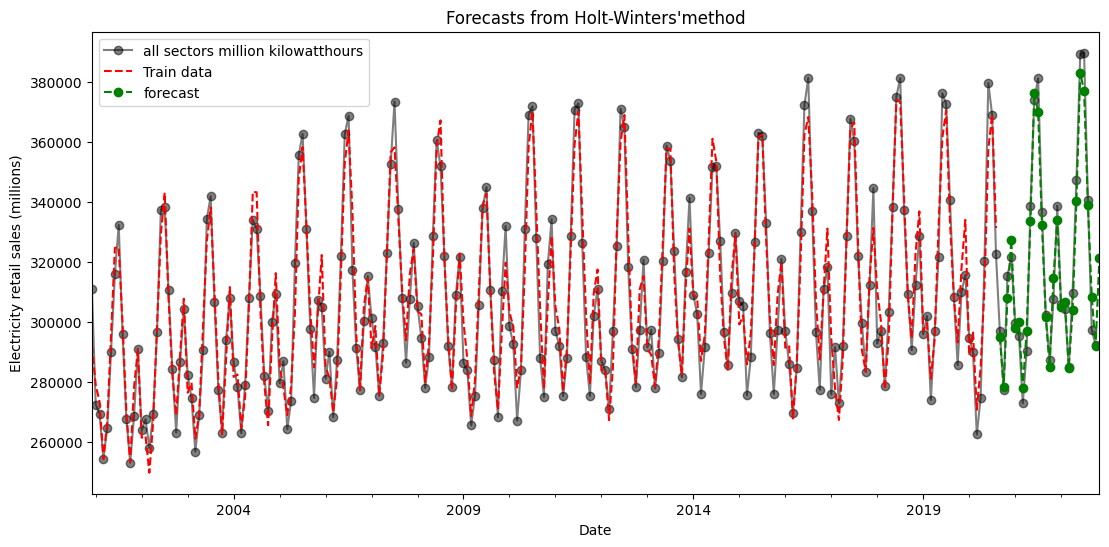

In [134]:
ax = data.plot(
    figsize=(13, 6),
    marker="o",
    color="black",
    alpha=0.5,
    title="Forecasts from Holt-Winters'method",
    label="actual values"
)
ax.set_ylabel("Electricity retail sales (millions)")
fit3.fittedvalues.plot(ax=ax, style="--", color="red", label="Train data")
fit3.forecast(fcast_months).rename("forecast").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)
plt.legend()
plt.show()

FIT 4 with multiplicative trend and multiplicative seasonal

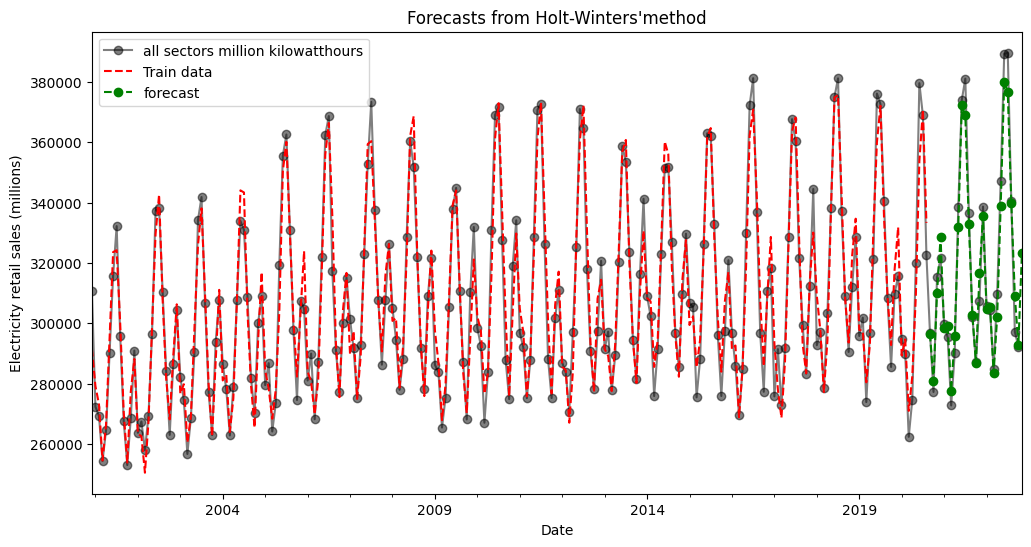

In [130]:
ax = data.plot(
    figsize=(12, 6),
    marker="o",
    color="black",
    title="Forecasts from Holt-Winters'method",
    alpha=0.5,
    label="actual values"
)
ax.set_ylabel("Electricity retail sales (millions)")
fit4.fittedvalues.plot(ax=ax, style="--", color="red", label="Train data")
fit4.forecast(fcast_months).rename("forecast").plot(
    ax=ax, style="--",  marker="o", color="green", legend=True
)
plt.legend()
plt.show()

Comparison of fitted parameters and SSE value

In [133]:
results

,Both Additive,"Additive (t) ,Multiplicative (s)","Multiplicative (t) ,Additive (s)",Both Multiplicative
$\alpha$,6.060714e-01,6.414286e-01,6.414286e-01,6.767857e-01
$\beta$,1.000000e-04,1.000000e-04,1.000000e-04,1.000000e-04
$\phi$,NaN,NaN,NaN,NaN
$\gamma$,1.750794e-01,1.054622e-01,1.687395e-01,1.010045e-01
$l_0$,2.795231e+05,2.795231e+05,2.795231e+05,2.795231e+05
$b_0$,4.928005e+02,4.928005e+02,1.001763e+00,1.001763e+00
SSE,1.282116e+10,1.196271e+10,1.286957e+10,1.199945e+10


A smaller SSE value inidicates a better fit which is obtained by using a different combination of trend and seasonal components, with a strong emphasis on the multiplicative seasonal component an we can see taht multiplicaitve seasonal component, we have a relatively smaller sse value.

